# Logistic Regression

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/f33eeb32-7f91-4ae7-a4a9-12e13a8ed1f6" width="67%" height="67%">

## 🔰 Logistic Function

- Logistic Function이 어떻게 생겼는지 확인한다.

- Sigmoid 함수는 입력값이 아무리 커도 출력값은 1로 수렴하고, 입력값이 아무리 작아도 출력값은 0으로 수렴한다..

In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1 + np.exp(-z)) #--> Sigmoid

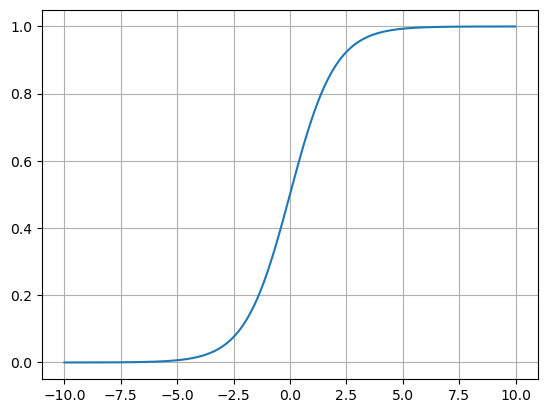

In [3]:
import matplotlib.pyplot as plt

plt.plot(z, g);
plt.grid()
plt.show()

#### --▶ 그래프 그리기의 디테일

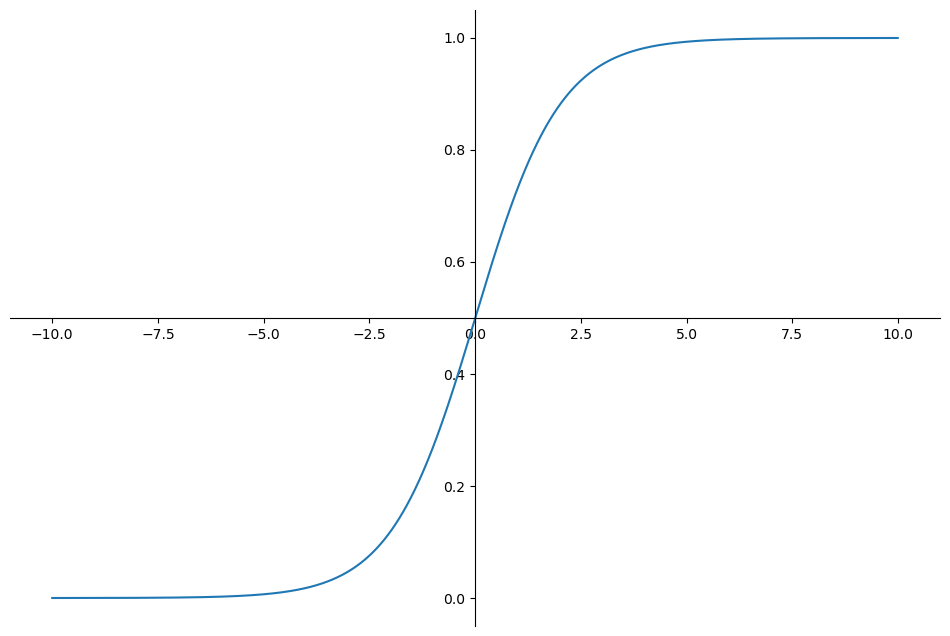

In [6]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z, g)

# 축지정
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

## 🔰 Cost Function

- Logistic Reg. Cost Function의 그래프 그리기

	<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/f6f91142-4bb1-42ba-83a1-815dc8109990" width="67%" height="67%">

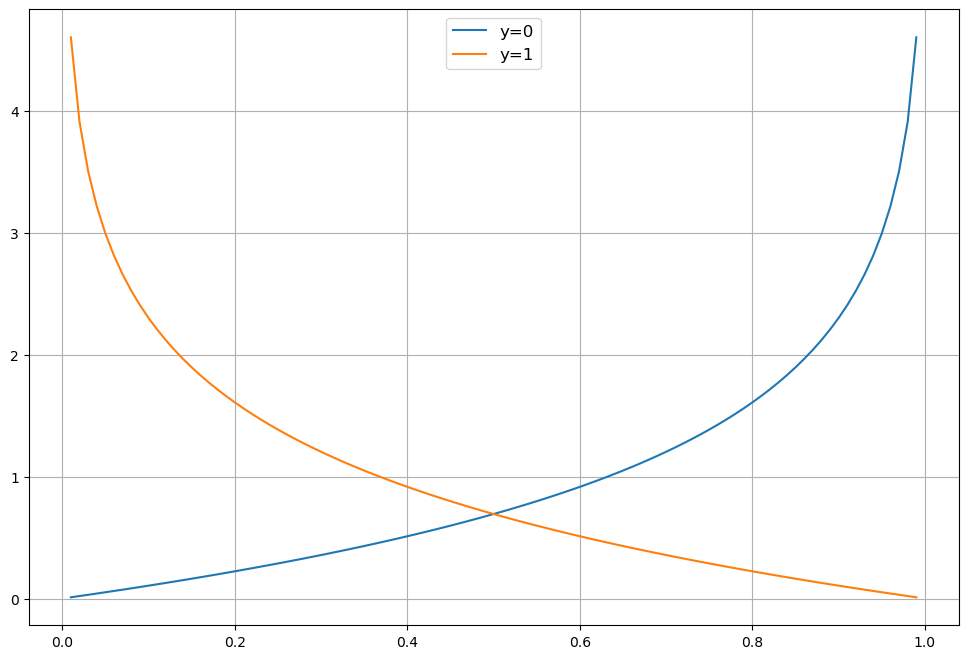

In [11]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')
plt.legend(fontsize=12, loc='upper center')
plt.grid()
plt.show()

<br></br>

---

# 예제 실습

## 🔰 기본 데이터

#### --▶ Wine Dataset

In [12]:
import pandas as pd

wine = pd.read_csv("../dataset/wine.csv", index_col=0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [15]:
# 맛 등급 만들기

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(columns=['taste', 'quality'])
y = wine['taste']

#### --▶ Split Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### --▶ Logistic Regression

- 초간단 로지스틱 회귀 테스트 구현

- `solver='liblinear'` 옵션은 최적화 알고리즘으로 무엇을 쓸 것인지 지정한다.

	데이터의 수가 많지 않으면 'liblinear'를 사용한다.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #--> 분류 문제이므로 Accuracy를 

log_reg = LogisticRegression(solver='liblinear', random_state=13)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test)) #--> Return the mean accuracy on the given test data and labels.

y_pred_tr = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

0.7438461538461538
Train Acc : 0.7425437752549547
Test Acc : 0.7438461538461538


</br>

## 🔰 전처리 데이터

#### --▶ Scaler ➡ Pipeline ➡ fit

- 스탠다드 스케일러로 데이터 전처리 후 파이프라인을 구축한다.

- Decision Tree의 경우 Standard Scale이 큰 영향을 주지 않았지만,

- Logical Regression의 경우 어떨지 적용해 본다.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
	('scaler', StandardScaler()),
	('clf', LogisticRegression(solver='liblinear', random_state=13))
]
pipe = Pipeline(estimators)

In [20]:
pipe.fit(X_train, y_train) #--> 파이브라인에 의해 데이터 전처리와 학습이 동시에

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [21]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7444679622859341
Test Acc : 0.7469230769230769


👉 아주 쬐끔 상승효과가 있다.

</br>

## 🔰 Decision Tree와 비교

- Logistic Regression은 조금 효과과 좋았던 전처리된 파이프라인 모델을 사용한다.

In [28]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)


models = {'logistic regression': pipe, 'decision tree': wine_tree}

#### --▶ AUC 그래프

- ROC curve 그래프를 이용해 두 모델의 성능을 비교한다.

In [29]:
for model_name, model in models.items():
    print(model_name)
    print(model)

logistic regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])
decision tree
DecisionTreeClassifier(max_depth=2, random_state=13)


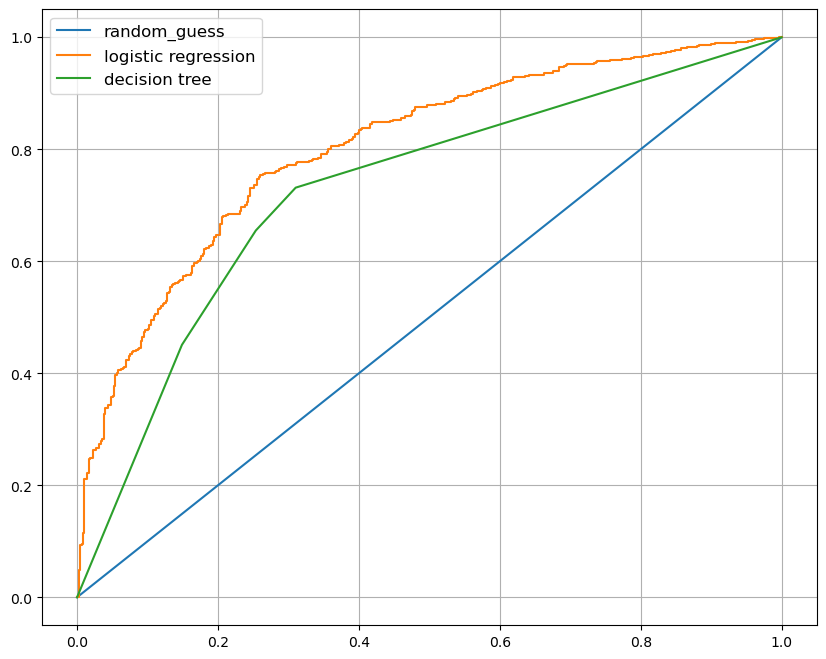

In [30]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.legend(fontsize=12)
plt.grid()
plt.show()

👉 ROC curve를 통해

$~~~~~\text{Logistic Regression Model이 Decision Tree 보다 더 성능이 좋음을 알 수 있다.}$